### Cross-entropy
[used site](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)
  
Definition of cross-entropy:  
*Cross-entropy* builds upon the idea of entropy from information theory and calculates the number of bits required to represent or transmit an average event from one distribution compared to another distribution.  
  
The intuition for this definition comes if we consider a target or underlying probability distribution P and an approximation of the target distribution Q, then the cross-entropy of Q from P is the number of additional bits to represent an event using Q instead of P.  
  
The cross-entropy between two probability distributions, such as Q from P, can be stated formally as:  
$$ H(P, Q) $$
  
Cross-entropy can be calculated using the probabilities of the events from P and Q, as follows:  
$$ H(P, Q) = \sum_x^X P(x) \cdot \log_2 Q(x) $$  
  
This calculation is for discrete probability distributions, although a similar calculation can be used for continuous probability distributions using the integral across the events instead of the sum.  
  
The result will be a positive number measured in bits and will be equal to the entropy of the distribution if the two probability distributions are identical.  

#### Simple example of cross-entropy calculation

In [1]:
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

We can plot a bar chart of these probabilities to compare them directyly as probability hisograms.

P=1.000 Q=1.000


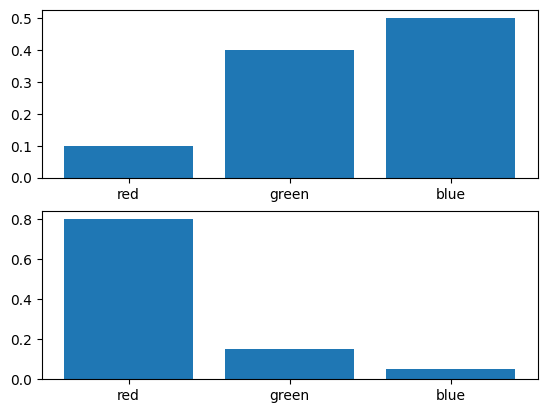

In [2]:
# plot of distributions
from matplotlib import pyplot
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

We can see that indeed the distributions are different.

In [3]:
from math import log2

# calculate cross-entropy
def cross_entropy(p, q):
    return -sum(p[i] * log2(q[i]) for i in range(len(p)))

We can use this funcion to calculate the cross-entropy of P from Q, as well as the reverse, Q from P.

In [4]:
# calculate H(P, Q)
ce_pq = cross_entropy(p, q)
print('H(P, Q): %.3f bits' % ce_pq)

# calculate cross entropy H(Q, P)
ce_qp = cross_entropy(q, p)
print('H(Q, P): %.3f bits' % ce_qp)

H(P, Q): 3.288 bits
H(Q, P): 2.906 bits


#### Cross-entropy as a Loss Function
Cross-entropy is widely used as a loss function when optimizing classification models.  
  
Two examples that you ay encounter include the logistic regression algorithm (a linear classification algorithm), and artifical neural networks.  
  
Each example has a known class label with a probability of 1.0, and a probability of 0.0 for all other labels. A model can estimate the probability of an example belonging to each class label. Cross-entropy can then be used to calculate the difference between the two probability distributions.  
  
As such, we can map the classification of one example onto the idea of a random variable with a probability distribution as follows: 
 * _Random Variable_: The example for which we require a predicted class label.
 * _Events_: Each class label that could be predicted.
  
In classification tasks, we know the target probability distribution P for an input as the class label 0 or 1 interpreted as probabilities as “impossible” or “certain” respectively. These probabilities have no surprise at all, therefore they have no information content or zero entropy.  
  
Our model seeks to approximate the target probability distribution Q.  
  
In the language of classification, these are the actual and the predicted probabilities, or *y* and *yhat*.
 * _Expected Probability_ (y): The known probability of each class label for an example in the dataset (P).
 * _Predicted Probability_ (yhat): The probability of each class label an example predicted by the model (Q).  
  
We can, therefore, estimate the cross-entropy for a single predictiion using the cross-entropy calculation described above.
  
When calculating cross-entropy for classification tasks, the base-e is used.  
  
We are often interested in minimizing the cross-entropy for the model across entire training dataset. This is calculated by calculating the average cross-entropy across all training examples.

#### Calculate cross-entropy between class lables and probabilities

In [5]:
# calculate cross entropy for classification problem
from math import log
from numpy import mean

# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log(q[i]) for i in range(len(p))])

# define classification data
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3]
# calculate cross entropy for each example
results = list()
for i in range(len(p)):
	# create the distribution for each event {0, 1}
	expected = [1.0 - p[i], p[i]]
	predicted = [1.0 - q[i], q[i]]
	# calculate cross entropy for the two events
	ce = cross_entropy(expected, predicted)
	print('>[y=%.1f, yhat=%.1f] ce: %.3f nats' % (p[i], q[i], ce))
	results.append(ce)

# calculate the average cross entropy
mean_ce = mean(results)
print('Average Cross Entropy: %.3f nats' % mean_ce)

>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=1.0, yhat=0.9] ce: 0.105 nats
>[y=1.0, yhat=0.9] ce: 0.105 nats
>[y=1.0, yhat=0.6] ce: 0.511 nats
>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=0.0, yhat=0.1] ce: 0.105 nats
>[y=0.0, yhat=0.4] ce: 0.511 nats
>[y=0.0, yhat=0.2] ce: 0.223 nats
>[y=0.0, yhat=0.1] ce: 0.105 nats
>[y=0.0, yhat=0.3] ce: 0.357 nats
Average Cross Entropy: 0.247 nats
